# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Alma Notes/Machine Learning/Supervised Learning/Linear Regression/housing.csv')


In [4]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [5]:
correct_df = pd.DataFrame(df.values, columns=['Values'])
correct_df.head()

,Values
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [6]:
Dataset = pd.DataFrame()

In [7]:
def arrang_df(x):
  ls = x.split(' ')
  result = [eval(num) for num in ls if len(num) != 0 ]
  return result

In [8]:
Dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']] = correct_df.apply(lambda x: arrang_df(x['Values']), axis=1, result_type='expand')

In [9]:
Dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [11]:
Dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
Dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329,-0.388249
ZN,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894,0.360393
INDUS,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737,-0.484126
CHAS,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576,0.175364
NOX,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262,-0.427295
RM,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734,0.695365
AGE,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782,-0.376932
DIS,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277,0.249896
RAD,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608,-0.381690
TAX,0.582568,-0.314351,0.720561,-0.035965,0.668141,-0.291680,0.506527,-0.534492,0.910202,1.000000,0.460100,-0.441505,0.543435,-0.468543


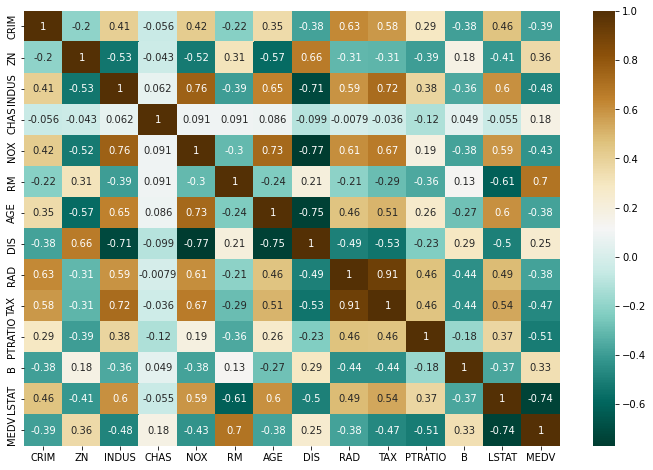

In [13]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
sns.heatmap(Dataset.corr(), cmap= 'BrBG_r', annot=True)
plt.ioff()

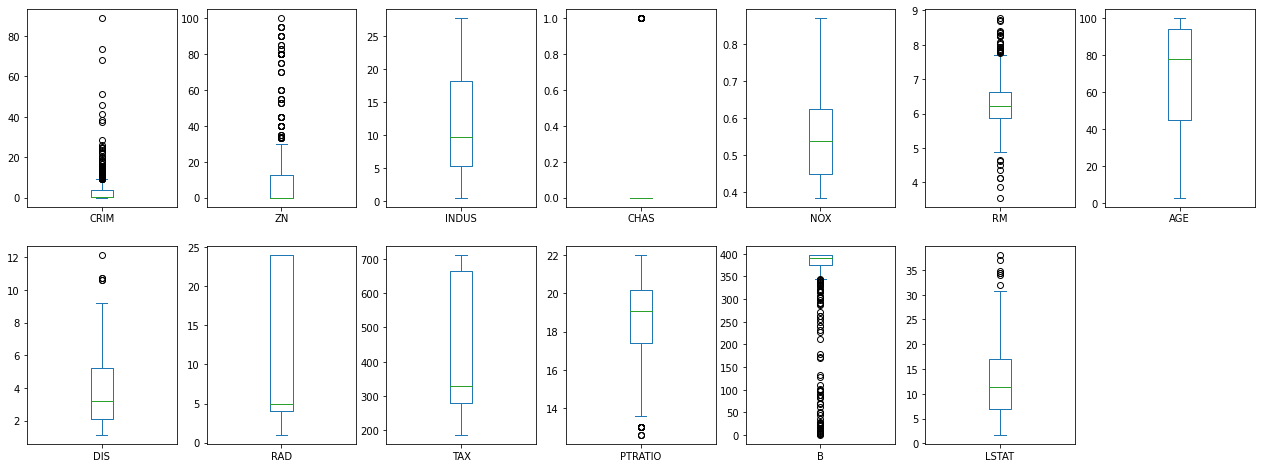

In [14]:
fig, ax = plt.subplots(figsize=(22, 8))
plt.subplot(2, 7, 1)
Dataset['CRIM'].plot(kind='box')
plt.subplot(2, 7, 2)
Dataset['ZN'].plot(kind='box')
plt.subplot(2, 7, 3)
Dataset['INDUS'].plot(kind='box')
plt.subplot(2, 7, 4)
Dataset['CHAS'].plot(kind='box')
plt.subplot(2, 7, 5)
Dataset['NOX'].plot(kind='box')
plt.subplot(2, 7, 6)
Dataset['RM'].plot(kind='box')
plt.subplot(2, 7, 7)
Dataset['AGE'].plot(kind='box')
plt.subplot(2, 7, 8)
Dataset['DIS'].plot(kind='box')
plt.subplot(2, 7, 9)
Dataset['RAD'].plot(kind='box')
plt.subplot(2, 7, 10)
Dataset['TAX'].plot(kind='box')
plt.subplot(2, 7, 11)
Dataset['PTRATIO'].plot(kind='box')
plt.subplot(2, 7, 12)
Dataset['B'].plot(kind='box')
plt.subplot(2, 7, 13)
Dataset['LSTAT'].plot(kind='box')


plt.ioff()